In [179]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Dropout , Flatten
from keras.utils import to_categorical 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

Label    Description
0        T-shirt/top
    1        Trouser
2        Pullover
3        Dress
4        Coat
5        Sandal
6        Shirt
7        Sneaker
8        Bag
9        Ankle boot

In [186]:
## Read in the training and the Testing Data

(X_train , y_train) , (X_test , y_test) = fashion_mnist.load_data()

In [158]:
X_train.shape

(60000, 28, 28)

In [159]:
y_train.shape

(60000,)

In [160]:
##Convert all the labels to ONE-HOT ENCODING
y_train_cat = to_categorical(y_train)

Preprocess the Data

In [161]:
X_train = X_train/255

In [162]:
X_train.shape


(60000, 28, 28)

In [163]:
##Now resize according to the way KERAS reads it
## i.e. ADD the number of color channels at the end if already not present
X_train = X_train.reshape((X_train.shape[0] , X_train.shape[1] , X_train.shape[2] , 1))
X_train.shape

(60000, 28, 28, 1)

In [164]:
X_train.max()

1.0

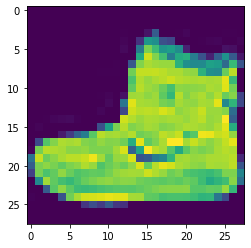

In [165]:
##One of  the sample images
plt.imshow(X_train[0])

In [166]:
##Build the actual mode

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)              

In [168]:
results = model.fit(x=X_train,
        y=y_train_cat,
        epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 47s 24ms/step - loss: 0.7925 - accuracy: 0.7032
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4032 - accuracy: 0.8523
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3301 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2950 - accuracy: 0.89160s - loss: 0.295
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2751 - accuracy: 0.8980
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2597 - accuracy: 0.9052
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2484 - accuracy: 0.9079
Epoch 8/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2511 - accuracy: 0.9103
Epoch 9/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2519 - accuracy: 0.9115
Epoch 10/10
1875/1875 [=========================

Text(0.5, 0, 'epochs')

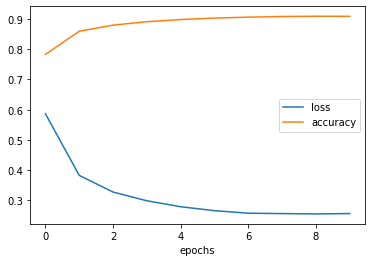

In [201]:
## Visualise losses and 
plt.plot(results.epoch ,results.history['loss'] , label = 'loss')
plt.plot(results.epoch ,results.history['accuracy'] , label = 'accuracy')
plt.legend()
plt.xlabel('epochs')

In [202]:
##Test the model through the testing dataset
X_test = X_test/255
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [204]:
##Predict the classes
predictions = model.predict_classes(X_test)

C:\Conda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [205]:
##Classification Report
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.81      0.82      1000
           3       0.90      0.88      0.89      1000
           4       0.86      0.76      0.80      1000
           5       0.99      0.94      0.96      1000
           6       0.67      0.71      0.69      1000
           7       0.95      0.95      0.95      1000
           8       0.92      0.99      0.95      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [241]:
##Now we'll test model on individual random images
##Create a function for predicting values

def predict(img_path) :
    img = cv2.imread(img_path , 0)
    img = img/255
    #img = img.reshape((1,28, 28, 1))
    img = cv2.resize(img , (28,28))
    img = img.reshape((1,28, 28, 1))
    
    ##0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot
    
    prediction = model.predict_classes(img)
    print(model.predict_proba(img))
    print(prediction)
    if prediction == 0 :
        prediction = "T-shirt/top"
    if prediction == 1 :
        prediction = "Trouser"
    if prediction == 2 :
        prediction = "Pullover"
    if prediction == 3 :
        prediction = "Dress"
    if prediction == 4 :
        prediction = "Coat"
    if prediction == 5 :
        prediction = "Sandal"
    if prediction == 6 :
        prediction = "Shirt"
    if prediction == 7 :
        prediction = "Sneaker"
    if prediction == 8 :
        prediction = "Bag"
    if prediction == 9 :
        prediction = "Ankle"
        
    return prediction
    

In [246]:
p = predict("shirt.jpg")
print(p)

[[2.9205805e-02 1.4191698e-06 1.1750111e-01 1.3510120e-04 2.7523413e-02
  2.0195298e-06 7.9821771e-01 1.5252617e-06 2.7369333e-02 4.2619620e-05]]
[6]
Shirt
